In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.utils import compute_class_weight
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import os
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from collections import Counter
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
X_attacker = np.load(Path("ClosestCarCSVsModel2/df_attacker_allscaled_flat.npy")) 
X_normal = np.load(Path("ClosestCarCSVsModel2/df_normal_allscaled_flat.npy")) 

X_normal_split, p = train_test_split(X_normal, test_size=0.70, random_state=42, shuffle=True)
print(X_normal_split.shape)
print(X_attacker.shape)

(11386, 1200)
(9583, 1200)


In [4]:
y = np.asarray([0]*X_normal_split.shape[0] + [1]*X_attacker.shape[0]).astype('float32')
X = np.concatenate((X_normal_split, X_attacker), axis=0)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

(20969, 1200)
(20969,)


In [5]:
xgb_r = xgb.XGBClassifier( 
    learning_rate = 0.1,
    max_depth = 5,
    n_estimators=1000,
    subsample=0.7,
    colsample_bytree=0.8,
    objective='binary:logistic',
    reg_alpha = 0.01,
    reg_lambda = 0.01
    )
xgb_r_SHAP = xgb_r
xgb_r_SHAP.fit(X_train, y_train)
y_pred = xgb_r_SHAP.predict(X_test)

# y_pred = cross_val_predict(xgb_r, X, y, cv=2, n_jobs=-1)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Accuracy: 0.7348265895953757
Precision: 0.7338622430580599


In [6]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}')

TN:3050, FP:738, FN:1097, TP:2035


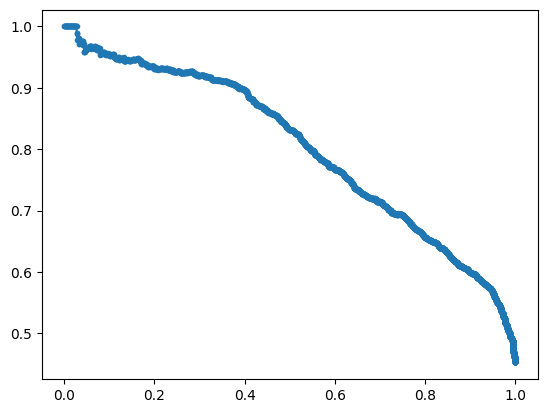

In [17]:
lr_probs = xgb_r_SHAP.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = xgb_r_SHAP.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.show()